In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We've covered some of the basics of plotting and visualization with matplotlib, and while things like line and scatter plots are fantastic tools for describing data, it is worth covering some of the specifically statistical forms of visualization that are easily available within matplotlib.

## Histogram

The **histogram** is a great tool for showing the possible values of a variable, as well as how common those values are.

Let's make one now. First we'll generate some random variables from a normal distribution (don't worry if you aren't familiar with this, we'll talk about more in the next unit), and then generate the plot.

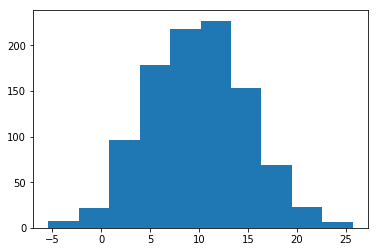

In [2]:
# Generate 1000 random values.
x = np.random.normal(10, 5, 1000)

# Plot them as a histogram.
plt.hist(x) 
plt.show()

The `10` and `5` we're passing into `random.normal()` are the "center" and the "standard deviation" of the normal curve we're using. Don't worry if you aren't familiar with those yet; we'll cover them in the next unit as well.

Now that we have a histogram let's go into a little more detail about how it works. It starts by dividing the values in the input into bins. These bins are evenly sized ranges that have an upper and lower bound. The histogram then counts how many values are in each bin and plots a bar for that count for each bin. That gives you a sense of the density of the variable across its range. Histograms are fantastic for visualizing the distribution of a variable.

### Bin count and placement

By default, matplotlib distributes all values into ten bins and chooses the best placement for those bins. That might not be the number you want and is totally adjustable with the `bins` keyword argument. 

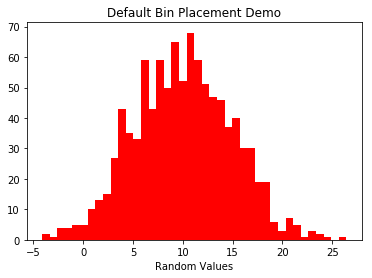

In [3]:
# Random data.
x = np.random.normal(10, 5, 1000)

# Build our histogram. Let's go ahead and set the color too.
plt.hist(x, bins=40, color='red')
plt.title('Default Bin Placement Demo')
plt.xlabel('Random Values')
plt.show()

If you re-run that cell above you'll notice that the x-axis and bin location will change slightly each time depending on the values of the underlying data. The edges of the bins probably don't line up exactly with the integer marks on the horizontal axis. That's because we're telling matplotlib _how many_ bins we want instead of _where_ we want each bin to be.

We can specify bin placement by passing in an array of _specific bounds_ for your bins rather than just the total _number_ you want. Let's do that and create a histogram with bins at exactly the integer marks from -10 to 40. While we're at it we'll add a second histogram to our figure.

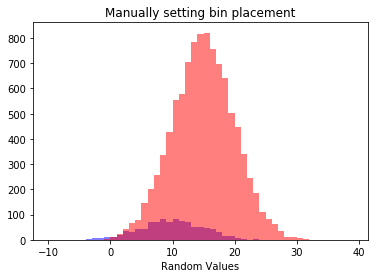

In [4]:
# Data to play with. Twice the histograms, twice the fun.
x = np.random.normal(10, 5, 1000)
y = np.random.normal(15, 5, 10000)

# Override bin defaults with specific bin bounds.
# FYI `alpha` controls the opacity.
plt.hist(x, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Manually setting bin placement')
plt.xlabel('Random Values')

plt.show()

### Normalizing histograms

Did you notice it's difficult to compare the distributions of the two variables with these two histograms? The scales of each variable are incompatible, so their heights are also incompatible, with the red histogram dominating the visualization. _Normalization_ allows you to solve this problem by rescaling the height of the bins so that the total area under each curve sums to 1.

This is useful when you have variables of different sizes (one with tens of thousands of observations, one with hundreds, for example) and you wish to compare their histograms.

Here is a plot with the same histograms, but this time they're normed.

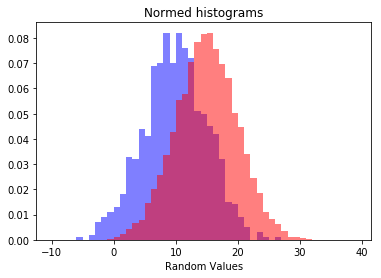

In [5]:
# Same data, this time normed.
plt.hist(x, normed=True, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, normed=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Random Values')

plt.show()

That's much easier to compare. Normalizing makes it easier to see the differences in the distributions between these two variables.

Those are the basics of histograms in Python. There is plenty more you can do with them. You're welcome to explore the `.hist()`[documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist), or simply follow along as we explore more later through the course.


## Boxplot

Another useful visualization is the _boxplot_. You can create one with the `plt.boxplot()` method, which takes an array and a series of other options as parameters, as well as the standard pyplot options for things like color.

A boxplot is a relatively simple visualization. Let's generate one and then go through its features. All we need is an array or variables. We'll use the same distribution as before. 

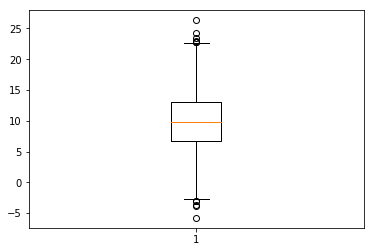

In [6]:
# Set the random seed to keep the example consistent.
np.random.seed(111)

# Sample data.
x = np.random.normal(10, 5, 1000)

# Generate and display the box plot.
plt.boxplot(x)
plt.show()

This plot consists of a box, which covers what is called the interquartile range. Let's talk about quartiles for a moment. You can divide data into quarters like this:
 
 * the lowest value to the 25th percentile,
 * the 25th percentile to the median,
 * the median to the 75th percentile, and
 * the 75th percentile to the maximum value.

These groups are called _quartiles_, and the middle two together are called the _interquartile range_, or "_IQR_". So the box in our visualization includes all the data from the 25th percentile to the 75th percentile, with a red line indicating the median.

Then there are the whiskers above and below the box (these plots are sometimes called "box and whisker plots"). The whiskers will extend up and down up to a distance of 1.5x the IQR away from the top and bottom of the box. If all values are within that range, the whiskers will go to the max and min of the variable. Anything beyond 1.5x the IQR will be represented as a _flier_, or a small tick beyond the end of the whiskers. Our plot above has several fliers above and below the whiskers. Here is one with fliers on the top only.

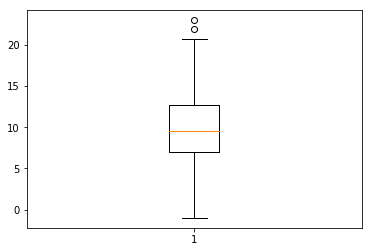

In [7]:
# Set the random seed to keep the example consistent.
np.random.seed(111)

# Sample data.
x = np.random.normal(10, 5, 100)

# Generate and display the box plot.
plt.boxplot(x)
plt.show()

Boxplots *aren't* useful for learning about the density or distribution of a variable. However, they are *very* useful for investigating the range of values and identifying possible _outliers_, or extreme values that warrant investigation and that may require special treatment. 

Data points marked with a flier on a box plot are often outliers. For this reason box plots are commonly used when initially exploring new data. You can read more about boxplots in the `.boxplot()` [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) if you like.